In [1]:
%load_ext autoreload
%autoreload 2

import ncem
import numpy as np
import seaborn as sns

from scipy.stats import ttest_rel, ttest_ind

dir_gs = "/storage/groups/ml01/workspace/anna.schaar/tissue/grid_searches_gen/"
dir_data = "/storage/groups/ml01/workspace/anna.schaar/tissue/data/"

sns.set_palette("colorblind")

# GLM

## Linear model

In [2]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210520_LINEAR_BASELINE_MAX_NODES_PATIENT_1_pascualreguanttonsil",
        "210520_LINEAR_MAX_NODES_PATIENT_1_pascualreguanttonsil",
    ],
    lateral_resolution = 0.325
)
gs_linear.load_gs()

210520_LINEAR_BASELINE_MAX_NODES_PATIENT_1_pascualreguanttonsil: loaded 1 runs with 3-fold cross validation
210520_LINEAR_MAX_NODES_PATIENT_1_pascualreguanttonsil: loaded 8 runs with 3-fold cross validation


subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']


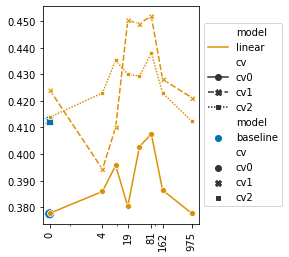

In [3]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='linear',
    baseline_model_class='linear_baseline',
    rename_levels = [
        ("model", {
            "LINEAR_BASELINE_MAX_NODES_PATIENT_1": "baseline",
            "LINEAR_MAX_NODES_PATIENT_1": "linear",
        })
    ],
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "linear": "C1"},
    xticks=[0,4,19,81,162, 975],
)

## Interaction model

In [4]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210419_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_pascualreguanttonsil",
        "210419_INTERACTIONS_MAX_NODES_PATIENT_1_pascualreguanttonsil",
    ],
    lateral_resolution = 0.325
)
gs_linear.load_gs()

210419_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_pascualreguanttonsil: loaded 1 runs with 3-fold cross validation
210419_INTERACTIONS_MAX_NODES_PATIENT_1_pascualreguanttonsil: loaded 8 runs with 3-fold cross validation


subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATI

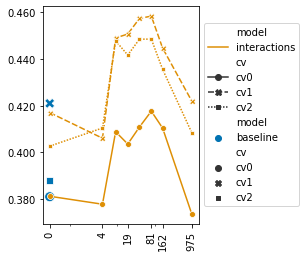

In [5]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1": "baseline",
            "INTERACTIONS_MAX_NODES_PATIENT_1": "interactions",
        })
    ],
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "interactions": "C1"},
    xticks=[0,4,19,81,162, 975],
)

In [6]:
test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(interaction_test_r2, baseline_test_r2))

Ttest_relResult(statistic=5.705323722208301, pvalue=0.02937438518356575)


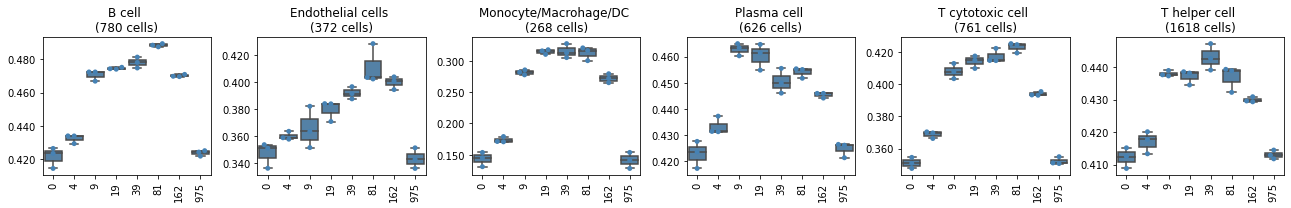

In [7]:
gs_linear.load_target_cell_evaluation()
gs_linear.target_cell_table = gs_linear.target_cell_table[gs_linear.target_cell_table['target_cell'] != 'other']
gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)